# Phase1

Authors:
@Priyank Raj Sharma
@Rhonda Kay Fischer
@Adam Paul Garofalo

All three of us have worked over the screen share to complete the full assignment. In each module we were equally involved.


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read data from a csv file

In [147]:
data = pd.read_csv("../data/Breast-Cancer-Wisconsin.csv")

data.head()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [148]:
# replace ? with nan and conver A7 column to numeric
data = data.replace("?",np.nan)
data["A7"] = pd.to_numeric(data["A7"])

In [149]:
# print null value for each column. A7 has 16 null value
print("A7 null values: ",data["A7"].isnull().sum())

A7 null values:  16


In [150]:
# Replace NaN values with the mean of column A7
data = data.fillna(data.mean())
data=data.astype("int64")
print("A7 null values: ",data["A7"].isnull().sum())

A7 null values:  0


In [151]:
# Print Summary statistics
print(data.describe())

                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               A6          A7          A8          A9         A10       CLASS  
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.532189    3.437768    2.866953    1.589413    2.689557  
std      2.214300    3.602774    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.00000

In [152]:
# Print number of rows and column

print("Rows : {0}, Column: {1}".format(data.shape[0],data.shape[1]))

Rows : 699, Column: 11


In [153]:
# Print Unique id values (column Scn)
print("Scn total unique id: ",len(data["Scn"].unique()))

Scn total unique id:  645


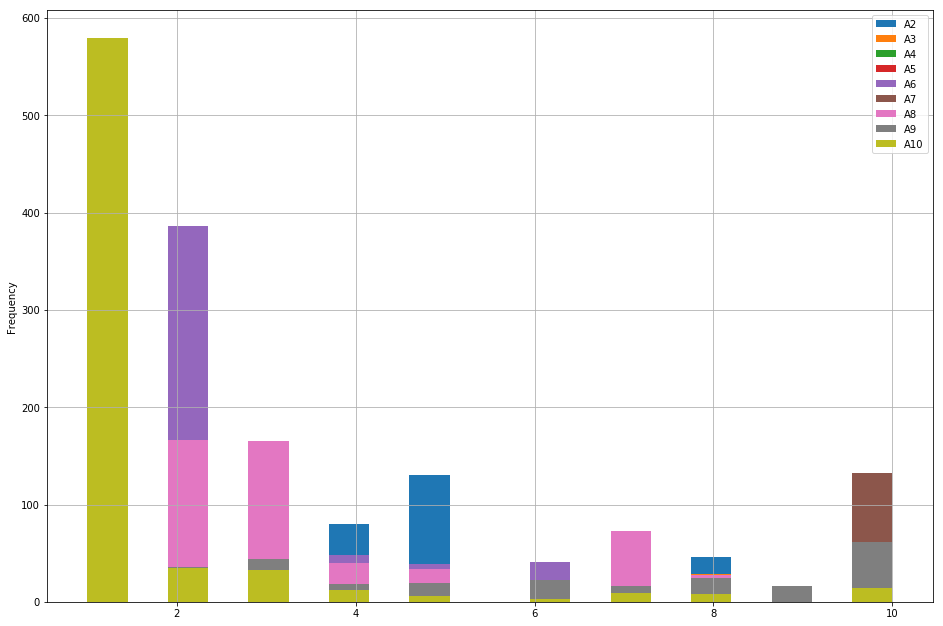

In [219]:
# Draw hostogram from A2-A10

plt.figure()

data.iloc[:,1:-1].plot(kind="hist",grid=True,bins=20)
plt.tight_layout(rect=(0, 0, 2.2, 2.2))


In [155]:
# Groupby to see counts of benign and malignant

print(data.groupby("CLASS")["CLASS"].count())

CLASS
2    458
4    241
Name: CLASS, dtype: int64


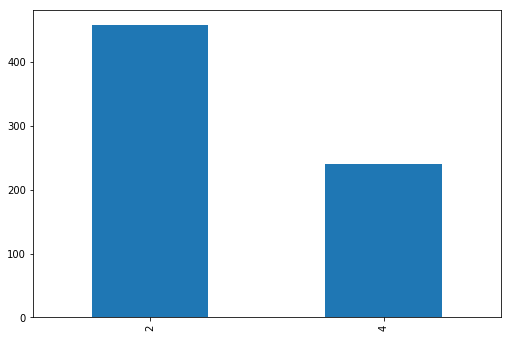

In [156]:
#Draw a bar plot for CLASS 
pd.value_counts(data["CLASS"]).plot(kind="bar")
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

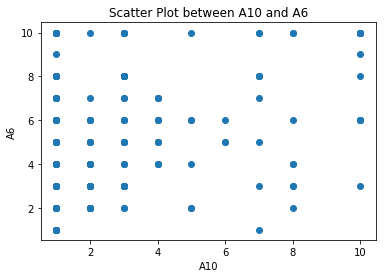

In [157]:
# Scatter plot between A10 and A6
plt.scatter(data["A10"],data["A6"])
plt.xlabel("A10")
plt.ylabel("A6")
plt.title("Scatter Plot between A10 and A6")
plt.show()

In [160]:
# printing corelation matrix to find relationship between each column
data.corr()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
Scn,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.097440,-0.060051,-0.052072,-0.034901,-0.080226
A2,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.588433,0.558428,0.535835,0.350034,0.716001
A3,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.687417,0.755721,0.722865,0.458693,0.817904
A4,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709812,0.735948,0.719446,0.438911,0.818934
A5,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666086,0.666715,0.603352,0.417633,0.696800
A6,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.582331,0.616102,0.628881,0.479101,0.682785
A7,-0.097440,0.588433,0.687417,0.709812,0.666086,0.582331,1.000000,0.676167,0.577347,0.339844,0.817442
A8,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.676167,1.000000,0.665878,0.344169,0.756616
A9,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577347,0.665878,1.000000,0.428336,0.712244
A10,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.339844,0.344169,0.428336,1.000000,0.423170


# Summary

1. Above bar chart shows, Benign cases are more than malignant
2. Corelation Matrix shows. 
   Scn column has no significance to classify Benign and malignant cases. Scn column can be ignored.
   A2 - A10 columns are important to classify Benign and malignant cases.